# Sinusoidal Modulation To transmit Carrier Signal ω(c)

* [1.4.3.a Sinusoidal modulation](https://www.coursera.org/learn/dsp1/lecture/0qtvW/1-4-3-a-sinusoidal-modulation)

Modulate the carrer signaln ω(c) (e.g. TV signal) on the modulation signal ω to transfer the career signal. There are two peaks ```(ω - ωc)``` and ```(ω + ωc)```.

<img src="../image/sinusoidal_modulation.png" align="left" width=700/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [2]:
# Parameters
fs = 5000                   # Sampling frequency
t = np.arange(-1, 1, 1/fs)  # Time vector

---
# Basics

DFT of $cos(ω_ct)$ in time domain is shifted delta functions $δ(ω-ω_c)$ and $δ(ω+ω_c)$ in Frequency Domain.


$$DFT[cos(ω_cn) = \frac{e^{iω_cn} + e^{-iωc_n}}{2}] = \frac{δ(ω-ω_c) + δ(w+ω_c)}{2}$$

<StemContainer object of 3 artists>

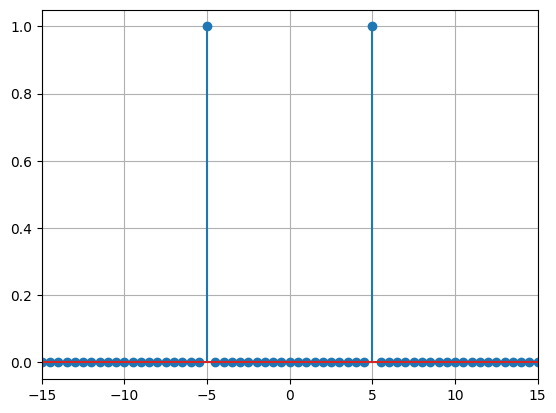

In [8]:
w = 5 * 2 * np.pi # ω = 2πf
dftc = 2 * np.fft.fft(np.cos(w * t), norm="forward")
freq = np.fft.fftfreq(len(t), d=1/fs)

plt.xlim(-15, 15)
plt.grid()
plt.stem(freq, dftc)

DFT of product in Time domain is convolution in Frequency Domain.

<img src="../image/modulation_is_convolution_in_frequency_domaion.jpeg" align="left"/>

<img src="../image/sinusoidal_modulation_as_convolution_in_frequency_domaion.png" align="left" width=700/>

---
# Careeer Signal

Signal to transmit.

In [3]:
wc = 3
signal = np.sin(2 * np.pi * wc * t)

# Baseband Modulation Signal

In [4]:
# Modulate signal to center it around the desired frequency
w = center_frequency = 15
modulation = np.cos(2 * np.pi * center_frequency * t)

# Modulated Signal

In [5]:
modulated_signal = signal * modulation

<StemContainer object of 3 artists>

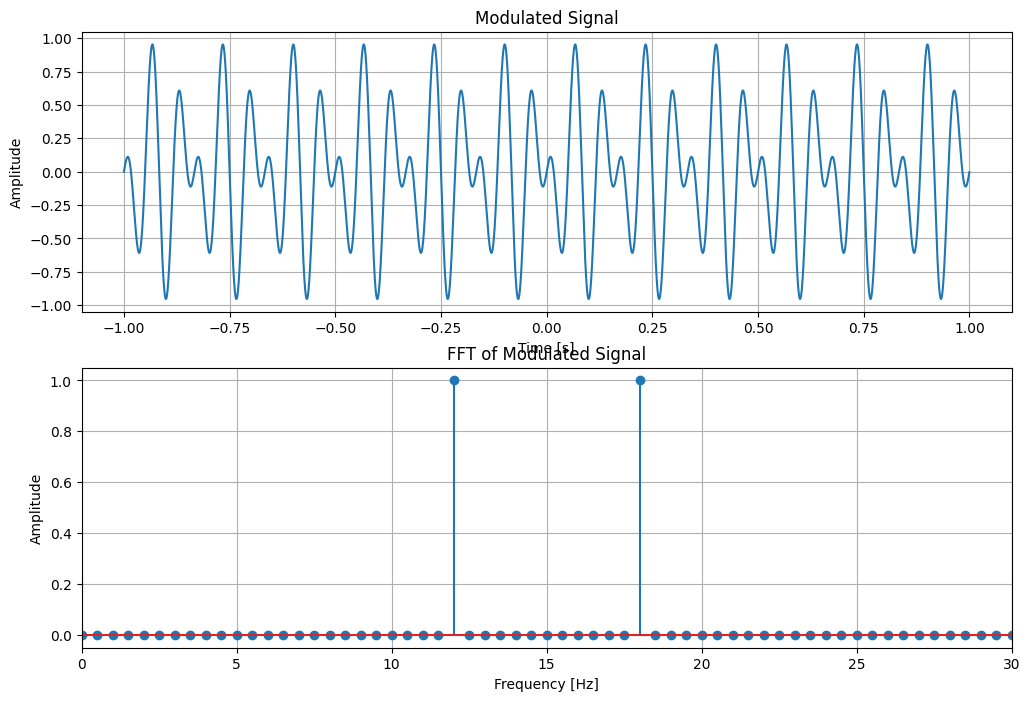

In [7]:
# Compute the FFT of the sinc function
dft = rfft(modulated_signal)
frequencies = rfftfreq(len(modulated_signal), 1/fs)

# Plotting
plt.figure(figsize=(12, 8))

# Plot modulated signal
plt.subplot(2, 1, 1)
plt.grid(True)
plt.title('Modulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(t, modulated_signal)

# Plot FFT of sinc function
plt.subplot(2, 1, 2)
plt.title('FFT of Modulated Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
# plt.xlim(-fs/2, fs/2)  # Limit x-axis to display only meaningful part of the spectrum
plt.xlim(0, 30)  # Limit x-axis to display only meaningful part of the spectrum
plt.grid(True)
plt.stem(frequencies, 2 * np.abs(dft) / len(dft))